In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'

dir_path = '../results/DGAD/method16'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/method16_lambda'
# dir_path = '../results/DGAD/method16_contamination'
# # dir_path = '../results/devnet/PACS_contamination'

# # dir_path = '../results/DGAD/method16_contamination_lambda'
# dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1'
# dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1_learn_all'

dir_path = '../results/DGAD/method16_lambda_sensitivity'
dir_path = '../results/DGAD/method16_MNIST'


domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUROC"
if dir_path.__contains__("MNIST"):
    domain_list = ["MNIST", "MNIST_M", "SYN", "SVHN"]

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("lambda_sensitivity"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
elif dir_path.__contains__("lambda"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
    para_name_list.remove("lr")
    para_name_list.remove("epochs")
if dir_path.__contains__("contamination"):
    para_name_list += ["contamination_rate"]
if dir_path.__contains__("VAE"):
    para_name_list += ["rec_lambda"]
if dir_path.__contains__("MNIST"):
    para_name_list += ["label_discount"]

# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)

ans["AUROC_mean"] = ans[[f"{item}_AUROC" for item in domain_list]].mean(axis = 1)
ans["AUPRC_mean"] = ans[[f"{item}_AUPRC" for item in domain_list]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[[f"val_{item}_AUROC" for item in domain_list]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[[f"val_{item}_AUPRC" for item in domain_list]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

61


,normal_class,anomaly_class,lr,epochs,cnt,label_discount,max_val_epoch,MNIST_AUROC,MNIST_M_AUROC,SYN_AUROC,...,val_SVHN_AUROC,val_MNIST_AUPRC,val_MNIST_M_AUPRC,val_SYN_AUPRC,val_SVHN_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,0,1 2 3 4 5 6 7 8 9,0.00005,20,1,108,10,0,0,0,...,0.732973,1.000000,0.504948,0.608167,0.115715,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.904484,0.557208
1,0,1 2 3 4 5 6 7 8 9,0.00005,20,1,27,6,0,0,0,...,0.679234,0.960604,0.231688,0.440761,0.045296,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.824162,0.419587
2,0,1 2 3 4 5 6 7 8 9,0.00010,30,0,216,18,0,0,0,...,0.601650,1.000000,0.646185,0.669708,0.031154,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.866113,0.586762
3,0,1 2 3 4 5 6 7 8 9,0.00001,30,0,108,26,0,0,0,...,0.761914,0.987850,0.488427,0.551248,0.074709,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.900718,0.525559
4,0,1 2 3 4 5 6 7 8 9,0.00010,40,3,108,24,0,0,0,...,0.777666,0.965501,0.730972,0.486130,0.125887,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.877006,0.577122


In [5]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [6]:
ans["normal_class"].value_counts()

0    61
Name: normal_class, dtype: int64

In [7]:
ans.cnt.value_counts()

0    47
1     8
3     6
Name: cnt, dtype: int64

In [8]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [10]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [11]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"{item}_{metric}" for item in domain_list] + [f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['MNIST_AUPRC',
 'MNIST_M_AUPRC',
 'SYN_AUPRC',
 'SVHN_AUPRC',
 'val_MNIST_AUPRC',
 'val_MNIST_M_AUPRC',
 'val_SYN_AUPRC',
 'val_SVHN_AUPRC',
 'AUPRC_mean',
 'MNIST_AUROC',
 'MNIST_M_AUROC',
 'SYN_AUROC',
 'SVHN_AUROC',
 'AUROC_mean']

In [12]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [13]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]:
#     selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [14]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [15]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [16]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],}

for item in domain_list:
    agg_method[f"val_{item}_{metric}"] = ["mean", "std"]
              
agg_method[f"val_AUPRC_mean"] = ["mean", "std"]
agg_method[f"val_AUROC_mean"] = ["mean", "std"]

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))

if dir_path.__contains__("contamination"):
    contamination_rate = 0.04
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    group_key = list(set(group_key) - set(["contamination_rate"]))
else:
    normal_class = '0'
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key
group_key.sort()
print(group_key)
if dir_path.__contains__("lambda"):
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method)
else:
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['epochs', 'label_discount', 'lr']
(30, 216, 5e-05)


cnt max_val_epoch           val_MNIST_AUROC  \
                              count          mean       std            mean   
epochs label_discount lr                                                      
30     216            0.00005     1          25.0       NaN        1.000000   
                      0.00050     1          14.0       NaN        1.000000   
40     216            0.00050     2          14.0  1.414214        0.999943   
20     216            0.00010     1          19.0       NaN        1.000000   
40     216            0.00001     2          31.5  4.949747        0.999943   
       108            0.00050     1          37.0       NaN        1.000000   
20     216            0.00005     2          16.0  4.242641        1.000000   
30     216            0.00001     1          26.0       NaN        0.999924   
40     216            0.00005     1          37.0       NaN        1.000000   
30     54             0.00050     1          16.0       NaN        0.992971   
40     216            0.00010     2          32.5  4.949747        1.000000   
20     108            0.00005     2          14.5  6.363961        1.000000   
40     108            0.00005     1          20.0       NaN        1.000000   
                      0.00001     1          38.0       NaN        0.999962   
30     108            0.00001     1          26.0       NaN        0.999622   
40     108            0.00010     2          21.0  4.242641        0.993065   
20     54             0.00010     1           3.0       NaN        0.998715   
       216            0.00001     2          17.0  1.414214        0.999244   
30     108            0.00010     1           7.0       NaN        1.000000   
40     27             0.00050     1          18.0       NaN        0.998262   
30     54             0.00001     1          28.0       NaN        0.999017   
       108            0.00050     1          22.0       NaN        0.999962   
20     108            0.00001     2          17.5  0.707107        0.999301   
40     54             0.00005     1          18.0       NaN        0.999282   
30     54             0.00005     1          23.0       NaN        0.999887   
       216            0.00010     1          18.0       NaN        1.000000   
       27             0.00001     1          28.0       NaN        0.995163   
20     108            0.00010     1           4.0       NaN        0.999962   
       54             0.00001     2          17.0  0.000000        0.998318   
       216            0.00050     1          13.0       NaN        1.000000   
30     108            0.00005     1          25.0       NaN        0.999887   
40     27             0.00001     1          24.0       NaN        0.995503   
20     54             0.00005     2           5.0  1.414214        0.998715   
30     54             0.00010     1          20.0       NaN        0.999811   
       27             0.00005     1          10.0       NaN        0.998791   
20     54             0.00050     1          11.0       NaN        0.999962   
40     27             0.00005     1          17.0       NaN        0.997770   
       54             0.00010     2          10.5  7.778175        0.989947   
20     27             0.00001     2          18.5  0.707107        0.993292   
30     27             0.00010     1           4.0       NaN        0.996334   
20     27             0.00005     2           7.5  2.121320        0.997600   
                      0.00010     1          13.0       NaN        0.994974   
40     27             0.00010     2          16.0  8.485281        0.996693   
20     27             0.00050     1           9.0       NaN        0.992933   
       108            0.00050     1          19.0       NaN        1.000000   
30     27             0.00050     1          27.0       NaN        0.857067   
40     54             0.00050     1          16.0       NaN        0.983182   

                                        val_MNIST_M_AUROC            \
          

In [17]:
MNIST_list = []
MNIST_index_list = []

for label_discount in [27, 54 , 108, 216]:
    MNIST_list.append(selected_records_anslysis.loc[(slice(None), label_discount, slice(None))].sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False).head(1))

MNIST_list = pd.concat(MNIST_list)
MNIST_list.index = [27, 54 , 108, 216]
MNIST_list

MNIST_analysis = []
for key in [f'val_{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]:
    tmp = []
    for mean, std in MNIST_list[key].values:
        tmp.append(f"{round(mean * 100, 2)}({round(std * 100, 2)})")
    MNIST_analysis.append(tmp)
MNIST_analysis = pd.DataFrame(MNIST_analysis).T
MNIST_analysis.index = MNIST_list.index
MNIST_analysis.columns = [f'{item}_{metric}' for item in domain_list] + [f"val_{metric}_mean"]
MNIST_analysis

,MNIST_AUROC,MNIST_M_AUROC,SYN_AUROC,SVHN_AUROC,val_AUROC_mean
27,99.83(nan),87.98(nan),89.61(nan),74.52(nan),87.98(nan)
54,99.3(nan),93.21(nan),98.11(nan),76.09(nan),91.68(nan)
108,100.0(nan),91.72(nan),96.89(nan),81.9(nan),92.63(nan)
216,100.0(nan),98.39(nan),98.56(nan),78.46(nan),93.85(nan)


In [18]:
# NCE_lambda_list=[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 10]
# reg_lambda_list=[1, 1, 1, 1, 1, 1, 2, 5, 10, 1, 1, 1]
# class_lambda_list=[1, 1, 1, 2, 5, 10, 1, 1, 1, 1, 1, 1]
# PL_lambda_list=[2, 5, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# lambda_list = []
# lambda_list_index = []

# for idx in range(len(NCE_lambda_list)):
#     NCE_lambda = NCE_lambda_list[idx]
#     reg_lambda = reg_lambda_list[idx]
#     class_lambda = class_lambda_list[idx]
#     PL_lambda = PL_lambda_list[idx]
#     lambda_list_index.append([NCE_lambda, PL_lambda, class_lambda, reg_lambda])
#     lambda_list.append(selected_records_anslysis.loc[(NCE_lambda, PL_lambda, class_lambda, slice(None), slice(None), reg_lambda)].sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False).head(1))

# lambda_list = pd.concat(lambda_list)
# lambda_list.index = pd.MultiIndex.from_tuples(lambda_list_index, names=["NCE_lambda", "reg_lambda", "class_lambda", "PL_lambda"])
# lambda_list

# lambda_analysis = []
# for key in [f'val_{item}_{metric}' for item in domain_list]:
#     tmp = []
#     for mean, std in lambda_list[key].values:
#         tmp.append(f"{round(mean * 100, 2)}({round(std * 100, 2)})")
#     lambda_analysis.append(tmp)
# lambda_analysis = pd.DataFrame(lambda_analysis).T
# lambda_analysis.index = lambda_list.index
# lambda_analysis.columns = [f'{item}_{metric}' for item in domain_list]
# lambda_analysis

In [19]:
for row in lambda_analysis.values:
    for item in row:
        print(item, end="\t")
    print()

NameError: name 'lambda_analysis' is not defined

In [ ]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","1","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [ ]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

66.1(4.09)
42.86(3.42)
56.18(3.74)
39.13(6.14)
51.07(4.29)


/tmp/ipykernel_81687/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,cnt,reg_lambda,NCE_lambda,PL_lambda,class_lambda,max_val_epoch,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
231,0.00001,20,2,10.0,1.0,1.0,1.0,4,0.660354,0.431667,0.577083,0.415618,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.868923,0.521180
304,0.00001,20,0,10.0,1.0,1.0,1.0,3,0.620370,0.393001,0.519106,0.321473,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.868510,0.463488
409,0.00001,20,1,10.0,1.0,1.0,1.0,6,0.702183,0.461145,0.589103,0.436834,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.905758,0.547316


In [ ]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/DGAD/method16_lambda_sensitivity/method=16,backbone=DGAD15,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=20,lr=1e-05,contamination=0.12,reg_lambda=10.0,NCE_lambda=1.0,PL_lambda=1.0,class_lambda=1.0,cnt=2.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [ ]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [ ]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [ ]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [ ]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(20, 5)

In [ ]:
data["test_results_list"].shape

(20,)

4
photo [0.36449938949938954, 0.6603535353535354, 0.664021164021164, 0.6020553520553521, 0.5927960927960928]
art_painting [0.1754742037350733, 0.4316666331752538, 0.308008658008658, 0.28833800186741365, 0.2873927187153931]
cartoon [0.2865666468607645, 0.5770833333333333, 0.5034722222222222, 0.3956608005521049, 0.40902920179235963]
sketch [0.2886053867957761, 0.41561791383219954, 0.48079264723100334, 0.4791218241682638, 0.4766484593988723]


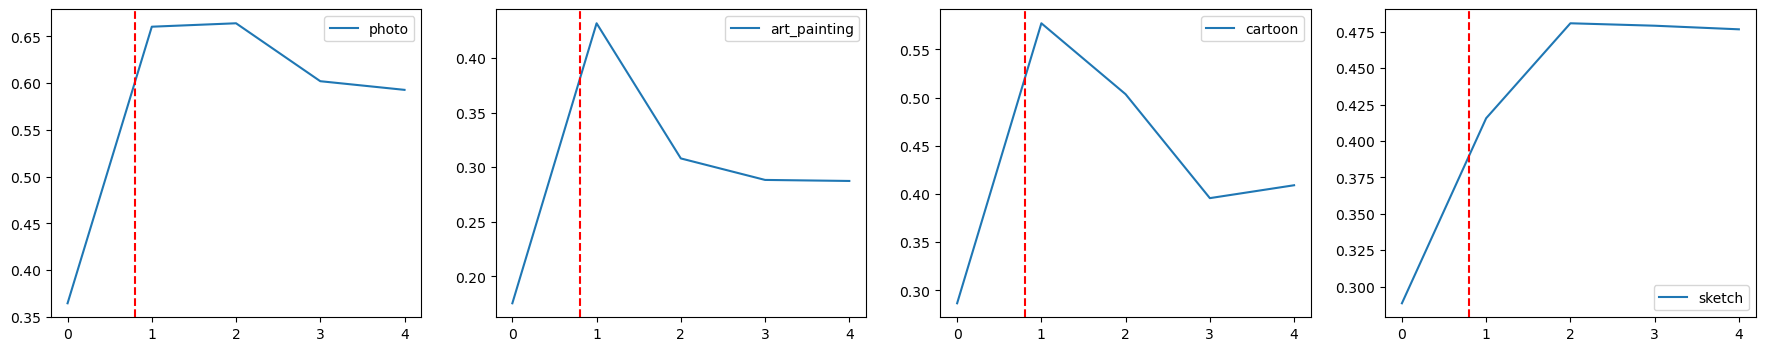

4
photo 0.6603535353535354
art_painting 0.4316666331752538
cartoon 0.5770833333333333
sketch 0.41561791383219954


In [ ]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

In [ ]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

tmp = []
for idx, domain in enumerate(domain_list):
    tmp.append(domain_test_trends[domain][metric])
tmp = pd.DataFrame(tmp, index=domain_list)
idx = tmp.mean(axis = 0).idxmax()
print(idx)
pd.concat([tmp, pd.DataFrame(tmp.mean(axis = 0), columns = ["avg"]).T])

1


,0,1,2,3,4
photo,0.364499,0.660354,0.664021,0.602055,0.592796
art_painting,0.175474,0.431667,0.308009,0.288338,0.287393
cartoon,0.286567,0.577083,0.503472,0.395661,0.409029
sketch,0.288605,0.415618,0.480793,0.479122,0.476648
avg,0.278786,0.521180,0.489074,0.441294,0.441467


### 训练集loss下降趋势

In [ ]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

(4,
 array([27.66371546, 26.59048805, 25.71706905, 24.81820431, 23.8842804 ,
        22.84935284, 21.95782976, 21.39310141, 20.95759068, 20.58865967,
        20.17078409, 19.88521929, 19.57686405, 19.38959913, 19.21618099,
        19.10568762, 18.99548464, 18.90929146, 18.86250458, 18.86672382]))

Error in callback <function flush_figures at 0x7f79c0c5c8b0> (for post_execute):


KeyboardInterrupt: 

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.66788591, 0.75495389, 0.76061009, 0.68059313, 0.6197445 ,
       0.61948029, 0.61872497, 0.61143907, 0.60031506, 0.60831104,
       0.61376016, 0.60531276, 0.59941329, 0.62004743, 0.60476455,
       0.61058923, 0.59882272, 0.6107425 , 0.60589399, 0.60655422])

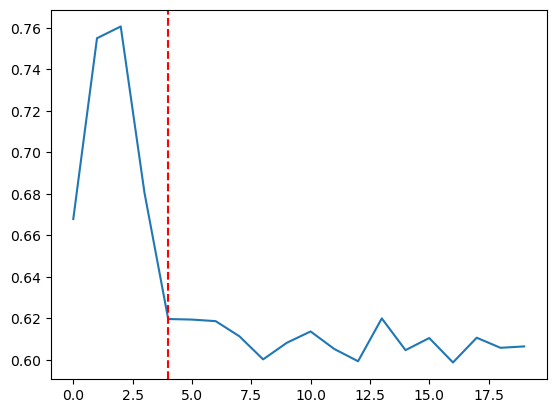

In [ ]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.72761905, 0.8168254 , 0.8415873 , 0.84793651, 0.84730159,
       0.84952381, 0.83809524, 0.83492063, 0.8368254 , 0.82793651,
       0.82190476, 0.82380952, 0.82063492, 0.82190476, 0.81174603,
       0.82539683, 0.81777778, 0.8168254 , 0.82285714, 0.8215873 ])

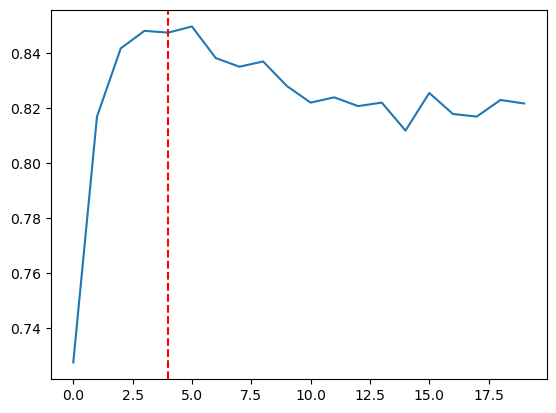

In [ ]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.28558114, 0.34650773, 0.39464473, 0.41457253, 0.41800416,
       0.40763934, 0.38613296, 0.38140119, 0.38469452, 0.37835523,
       0.36441865, 0.36332333, 0.36064481, 0.37663249, 0.35296976,
       0.35024525, 0.36357957, 0.34994954, 0.35357022, 0.35131659])

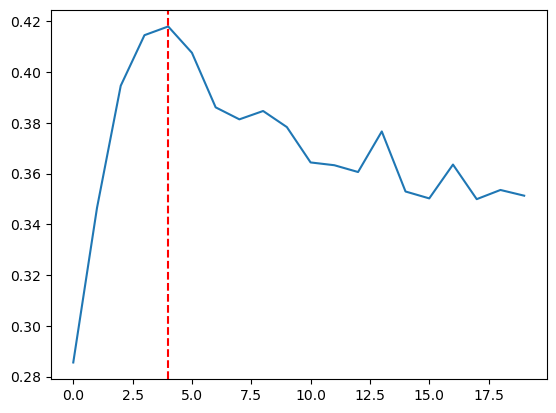

In [ ]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.48861197 2.46692395 2.43435377 2.39334112 2.34831296 2.30456625
 2.26025409 2.21894714 2.17526249 2.13742483 2.10214987 2.0721581
 2.0427256  2.02252923 2.00795358 1.99793211 1.98355131 1.97785565
 1.97420591 1.97457647]


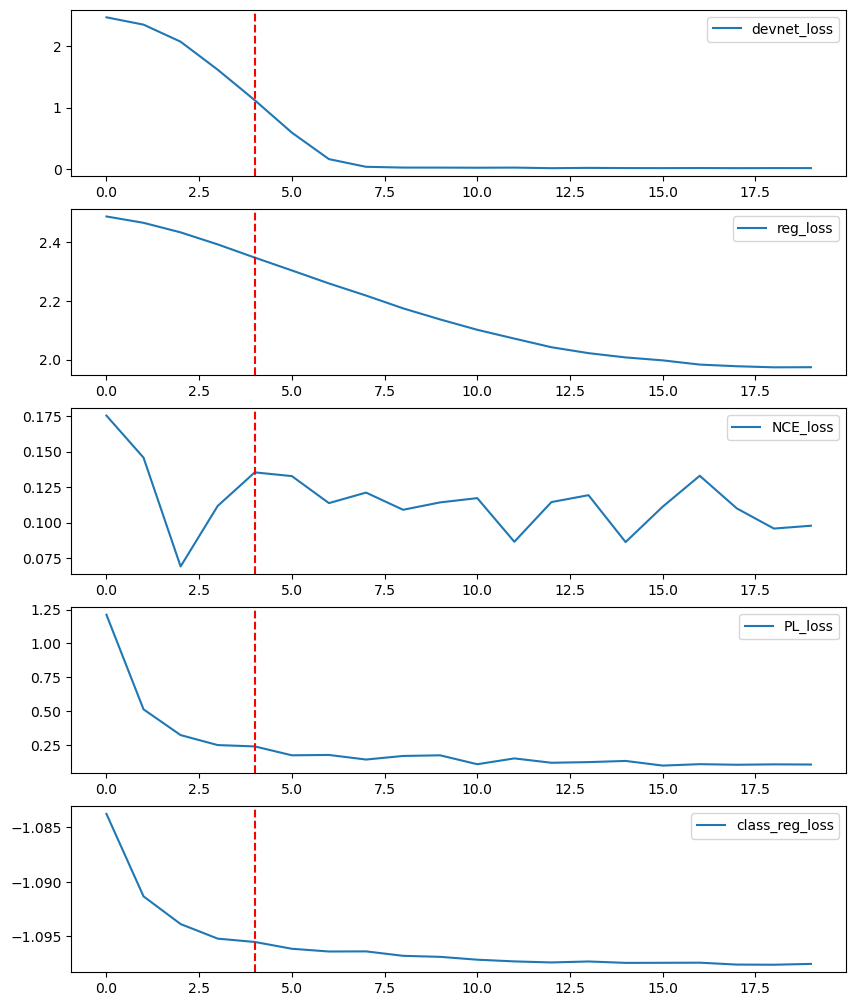

In [ ]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [ ]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [ ]:
# data["sub_train_results_loss"].mean(axis=1)

In [ ]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [ ]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 